# ProsperLoan data Exploration 
## by: Abubakar Keita
### City and Country: Monrovia, Liberia
## Preliminary Wrangling

> This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process. I will use Python visualization libraries to systematically explore a selected dataset, starting from plots of single variables and building up to plots of multiple variables in the first part and I will also produce a short presentation that illustrates interesting properties, trends, and relationships that I will be discovered in my selected dataset. This data set selected contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. My Exploration will focus on 11 variables. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Loading the prosper loan data set below

In [2]:
prosperLoan = pd.read_csv('prosperLoanData.csv')
# high-level overview of data shape and composition

### Selectig and wragling  my variables 

In [3]:
# Select 12 variables and convert to DataFrame
prosperLoan_sub = prosperLoan[['MemberKey','LoanOriginalAmount', 'LoanOriginationDate', 'LoanStatus', 'BorrowerAPR',
                               'BorrowerRate', 'ListingCategory (numeric)', 'DebtToIncomeRatio',
                               'BorrowerState','ProsperRating (Alpha)', 'EmploymentStatus']]

In [4]:
# renaming some variables for better understanding 
prosperLoan_sub = prosperLoan_sub.rename(columns = {'LoanOriginalAmount': 'amount', 'MemberKey':'borrower_id', 
                                   'LoanStatus': 'loanStatus','BorrowerAPR': 'borrowerAPR','BorrowerRate':'interestRate', 
                                   'ListingCategory (numeric)':'listingCategory', 'ProsperRating (Alpha)': 'prosperRating'})

In [5]:
# Replacing the listing_category values with their equivalent categorical values
# The listing category is the list of reasons for getting the loans
prosperLoan_sub = prosperLoan_sub.replace({'listingCategory': {0:'Not Available', 1:'Debt Consolidation', 
                                                                2:'Home Improvement', 3:'Business', 4:'Personal Loan', 
                                                                5:'Student_Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 
                                                                9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 
                                                                12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 
                                                                15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes',
                                                                19:'Vacation', 20:'Wedding Loans'}})

In [6]:
# data wrangling,
# Drop all rows that have missing prosper rating which is my main favorable of interest to investigate borrowerAPR
prosperLoan_sub = prosperLoan_sub[~prosperLoan_sub.borrowerAPR.isna()]
# convert listing category from object datatype to category datatype
prosperLoan_sub['listingCategory'] = prosperLoan_sub['listingCategory'].astype('category')

In [7]:
# Convert ProsperRating and EmploymentStatus into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
prosperLoan_sub['ProsperRating'] = prosperLoan_sub['prosperRating'].astype(ordered_var)

empl_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = empl_order)
prosperLoan_sub['EmploymentStatus'] = prosperLoan_sub['EmploymentStatus'].astype(ordered_var)

In [8]:
# Display the first 5 rows of the ProaperLoan data
prosperLoan_sub.head()

,borrower_id,amount,LoanOriginationDate,loanStatus,borrowerAPR,interestRate,listingCategory,DebtToIncomeRatio,BorrowerState,prosperRating,EmploymentStatus,ProsperRating
0,1F3E3376408759268057EDA,9425,2007-09-12 00:00:00,Completed,0.16516,0.1580,Not Available,0.17,CO,NaN,Self-employed,NaN
1,1D13370546739025387B2F4,10000,2014-03-03 00:00:00,Current,0.12016,0.0920,Home Improvement,0.18,CO,A,Employed,A
2,5F7033715035555618FA612,3001,2007-01-17 00:00:00,Completed,0.28269,0.2750,Not Available,0.06,GA,NaN,Not available,NaN
3,9ADE356069835475068C6D2,10000,2012-11-01 00:00:00,Current,0.12528,0.0974,Motorcycle,0.15,GA,A,Employed,A
4,36CE356043264555721F06C,15000,2013-09-20 00:00:00,Current,0.24614,0.2085,Home Improvement,0.26,MN,D,Employed,D


In [9]:
# Statisitcal insights
prosperLoan_sub.describe()

,amount,borrowerAPR,interestRate,DebtToIncomeRatio
count,113912.000000,113912.000000,113912.000000,105358.000000
mean,8338.015661,0.218828,0.192786,0.275993
std,6245.940592,0.080364,0.074809,0.551814
min,1000.000000,0.006530,0.000000,0.000000
25%,4000.000000,0.156290,0.134000,0.140000
50%,6500.000000,0.209760,0.184000,0.220000
75%,12000.000000,0.283810,0.250000,0.320000
max,35000.000000,0.512290,0.497500,10.010000


In [10]:
# numbers of columns, rows, datatypes
prosperLoan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   borrower_id          113912 non-null  object  
 1   amount               113912 non-null  int64   
 2   LoanOriginationDate  113912 non-null  object  
 3   loanStatus           113912 non-null  object  
 4   borrowerAPR          113912 non-null  float64 
 5   interestRate         113912 non-null  float64 
 6   listingCategory      113912 non-null  category
 7   DebtToIncomeRatio    105358 non-null  float64 
 8   BorrowerState        108422 non-null  object  
 9   prosperRating        84853 non-null   object  
 10  EmploymentStatus     111682 non-null  category
 11  ProsperRating        84853 non-null   category
dtypes: category(3), float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### LoanOriginationDate
- LoanOriginationDate:__	The date the loan was originated.

In [11]:
# Convert the string to datetime
prosperLoan_sub['LoanOriginationDate'] =  prosperLoan_sub['LoanOriginationDate'].astype('datetime64[ns]')
prosperLoan_sub['LoanOriginationDate'].dtype

dtype('<M8[ns]')

### What is the structure of your dataset?
> There are 113937 entries in the ProsperLoan dataset with 81 variables (columns):__(LoanNumber, amount, borrower_id, loan_duration, loan_status, borrower_APR, interest, listing_category, ProsperScore, CreditGrade, BankcardUtilization, EstimatedLoss, DebtToIncomeRatio, StatedMonthlyIncome, BorrowerState, prosper_rating, EmploymentStatus, OnTimeProsperPayments) and so on__
### What is/are the main feature(s) of interest in your dataset?

>  My variables of interest is borrowerAPR or interest that need to be investigated.
- _What affects the borrower’s APR or interest rate?_

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think, the prosperRating, borrowerRate and debt-to-income-ratio will help investigate borrower APR. 

## Univariate Exploration

####  _In this section, I am investigating distributions of individual variables. data cleaning and exploration with be carried out simultaneously._

### BorrowerAPR (main variable of interest)
- The Borrower’s APR (annual percentage Rate)for the loan. It extra fees paid in addition to the interest. Heance, it is very important to investigate it.

In [12]:
# Statistics of the borrower APR - a feature to investigate
prosperLoan_sub.borrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: borrowerAPR, dtype: float64

In [13]:
# Check for null values
prosperLoan_sub.borrowerAPR.isnull().value_counts()

False    113912
Name: borrowerAPR, dtype: int64

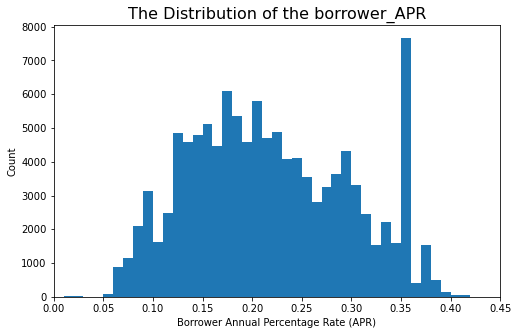

In [14]:
# beginning with a standard-scaled plot
binsize = 0.01
bins = np.arange(0, prosperLoan_sub['borrowerAPR'].max()+binsize, binsize);

plt.figure(figsize=[8, 5])
plt.hist(data = prosperLoan_sub, x = 'borrowerAPR', bins = bins);
plt.xlabel('Borrower Annual Percentage Rate (APR)');
plt.ylabel('Count')
plt.title('The Distribution of the borrower_APR', fontsize = 16)
plt.xlim(0,0.45)
plt.show()

#### _From the statistics above, The distribution of the borrower_APR variable is multimodal with few peaks observed at 0.35 . There are  25 null values in the rows that need to be address. Interestingly, the extra cost of loan lisitng at about 0.36 has the highest peak. This need to be further investigated._

### BorrowerRate (interestRate)
- IntersetRate: The Borrower's interest rate for this loan. 

In [15]:
# Statistics of the interest rate the loans listed
prosperLoan_sub.interestRate.describe()

count    113912.000000
mean          0.192786
std           0.074809
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: interestRate, dtype: float64

In [16]:
prosperLoan_sub.interestRate.isnull().value_counts()

False    113912
Name: interestRate, dtype: int64

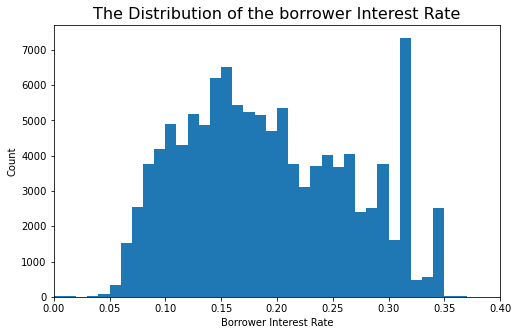

In [17]:
# standard-scaled plot of the interest variable
binsize = 0.01
bins = np.arange(0, prosperLoan_sub['interestRate'].max()+binsize, binsize);

plt.figure(figsize=[8, 5])
plt.hist(data = prosperLoan_sub, x = 'interestRate', bins = bins);
plt.xlabel('Borrower Interest Rate');
plt.ylabel('Count')
plt.title('The Distribution of the borrower Interest Rate', fontsize = 16)
plt.xlim(0,0.4)
plt.show()

#### _The distribution of the interest rate is unimodal and  is roughly normal distribution except for the long peak at 0.32 above. Loan with 0% interest need to be investigated . Most of the loans fall between the interests of 0.06% and 0.32%._

### LoanOriginalAMount (Amonut):
- Amount (LoanOriginalAmount): The origination amount of the loan.

In [18]:
# statistics of the original loan amount
prosperLoan_sub['amount'].describe()

count    113912.000000
mean       8338.015661
std        6245.940592
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: amount, dtype: float64

In [19]:
# Check for null values
prosperLoan_sub['amount'].isnull().value_counts()

False    113912
Name: amount, dtype: int64

Text(0.5, 1.0, 'Loan Distribution')

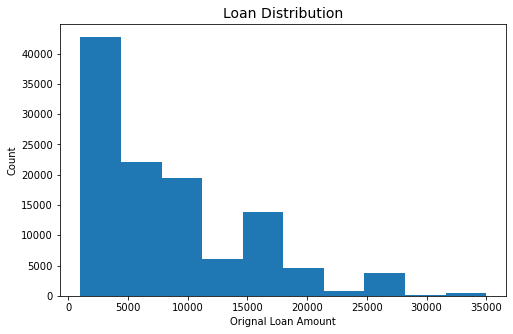

In [20]:
# plotting with standard scale
plt.figure(figsize=[8, 5])
plt.hist(data = prosperLoan_sub, x = 'amount');
plt.xlabel('Orignal Loan Amount');
plt.ylabel('Count')
plt.title('Loan Distribution', fontsize = 14)


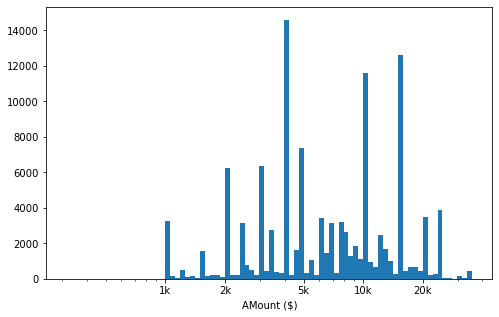

In [21]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.5, np.log10(prosperLoan_sub['amount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data =prosperLoan_sub, x = 'amount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4], ['1k', '2k', '5k', '10k', '20k'])
plt.xlabel('AMount ($)')
plt.show()

#### _The distribution  of the original loan amount is multimodal with high peaks near 1000, 2000, 3000, 4000, 5000, 10000, 15000 and  20000.  I need to find out why more loans were listed at these amounts._

### BorrowState
- BorrowerState:The two letter abbreviation of the state of the address of the borrower at the time the Listing was created. I will like to investigate the percentage of defaulters across the country.

In [22]:
#prosperLoan_sub['BorrowerState'].value_counts()

In [23]:
# Check for null values
prosperLoan_sub['BorrowerState'].isnull().value_counts()

False    108422
True       5490
Name: BorrowerState, dtype: int64

Text(0, 0.5, 'Counts')

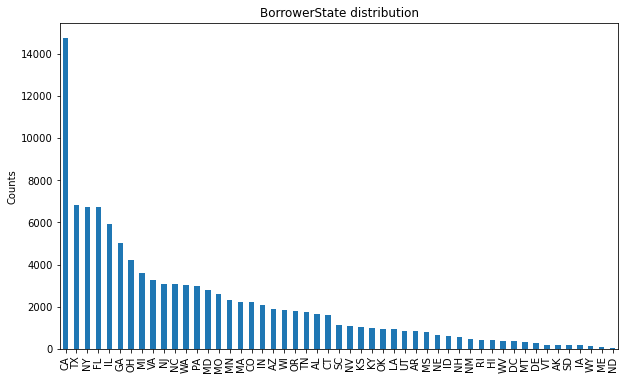

In [24]:
# Standard scale ploting
plt.figure(figsize = [10, 6])
prosperLoan_sub['BorrowerState'].value_counts().plot(kind = 'bar');
plt.title('BorrowerState distribution')
plt.ylabel('Counts')

In [25]:
# mean of loan per state
prosperLoan_sub.groupby('BorrowerState')['amount'].mean()

BorrowerState
AK     9311.805000
AL     7555.955926
AR     7696.898246
AZ     8199.756444
CA     8974.325814
CO     8598.823529
CT     9129.649662
DC    10125.751309
DE     8840.586667
FL     8207.460565
GA     8362.862220
HI     9147.772616
IA     5601.919355
ID     7525.479132
IL     8395.930924
IN     8068.064485
KS     8316.196798
KY     8545.389624
LA     8571.556604
MA     9514.832293
MD     9249.990429
ME     4849.584158
MI     7645.207348
MN     7869.150992
MO     7122.427533
MS     8265.705210
MT     7180.818182
NC     7995.618677
ND     4138.653846
NE     8156.716617
NH     9463.039927
NJ     9529.019374
NM     8734.510593
NV     8796.280734
NY     8833.034329
OH     8078.257803
OK     7966.909372
OR     7511.592735
PA     8421.116420
RI     8752.788506
SC     8410.013369
SD     7694.518519
TN     8115.069085
TX     9087.852675
UT     7838.031927
VA     8971.437462
VT     8205.294686
WA     7909.199475
WI     8421.375679
WV     8125.664962
WY     8171.920000
Name: amount, dty

#### _The plot illustrates the States in order of increasing number of listings from left to right. California State got the highest numbers of listings- more than 14000 and North Dakota (ND) got the least. However, the statistics shows that DC (District of Columbia)  got the highest average of loan amount. This means that, despite the low count  of  listings, they got the highest amount individually _  

### EmploymentStatus
- EmploymentStatus: The employment status of the borrower at the time they posted the listing.

In [26]:
# Counts of employment status 
prosperLoan_sub['EmploymentStatus'].dropna(how ='any', axis = 0).value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [27]:
# Checking for null values that may affect my investigation
prosperLoan_sub['EmploymentStatus'].isnull().value_counts()

False    111682
True       2230
Name: EmploymentStatus, dtype: int64

Text(0.5, 1.0, 'Employment Status bar Chart')

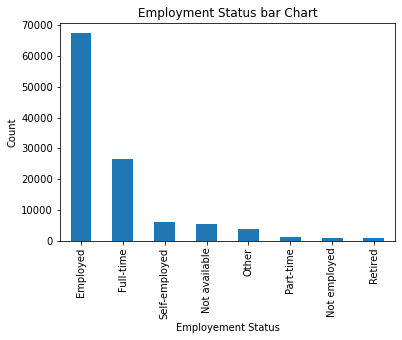

In [28]:
#bar plot of the employement status variable
prosperLoan_sub['EmploymentStatus'].value_counts().dropna().plot(kind = 'bar');
plt.ylabel('Count')
plt.xlabel('Employement Status')
plt.title('Employment Status bar Chart')

#### _Most of the loan beneficiaries are  employed and the retired or not-employed are the least.  I think this has a relationship with loan borrower states. This will be investigated in bivariate ploting._

### ProsperRating
- ProsperRating (Alpha):The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

In [29]:
# Prosper rating count
prosperLoan_sub = prosperLoan_sub.query('LoanOriginationDate >"2009-07-31"')
prosperLoan_sub.prosperRating.value_counts()

C     18339
B     15581
A     14549
D     14272
E      9794
HR     6934
AA     5368
Name: prosperRating, dtype: int64

In [30]:
# Checking for null values
prosperLoan_sub.prosperRating.isnull().value_counts()

False    84837
True       127
Name: prosperRating, dtype: int64

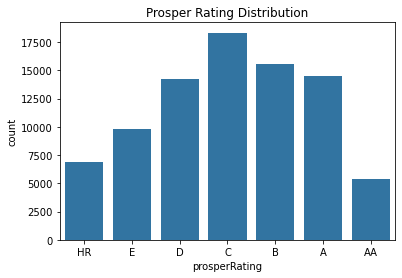

In [31]:
# prosper rating countplot 
base_color = sb.color_palette()[0]
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
sb.countplot(data = prosperLoan_sub, x = 'prosperRating', order = rating_order, color = base_color);
plt.title('Prosper Rating Distribution');

#### _The plot above indicates that AA rating has the lowest count and C has the highest count . Prosper rating is one key feature that  afects the borrower annual percentage rate._ 

### Listing Category
- __ListingCategory:__	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [32]:
# count of listing category
prosperLoan_sub['listingCategory'].value_counts()

Debt Consolidation    53237
Other                  9234
Home Improvement       6810
Business               5315
Auto                   2243
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Motorcycle              304
Student_Use             280
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Not Available            20
Personal Loan             0
Name: listingCategory, dtype: int64

In [33]:
# Checking for null value
prosperLoan_sub['listingCategory'].isnull().value_counts()

False    84964
Name: listingCategory, dtype: int64

<AxesSubplot:>

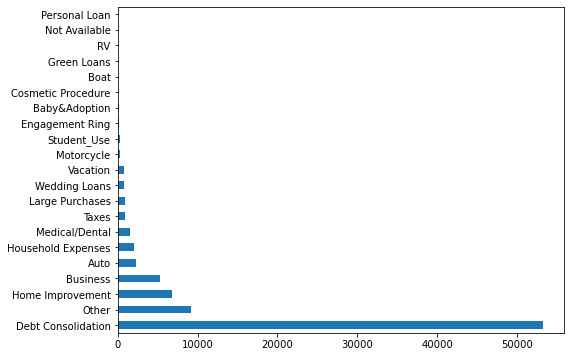

In [34]:
# Horizontal bar plot for listing category
plt.figure(figsize= [8, 6]) 
prosperLoan_sub['listingCategory'].value_counts().plot(kind = 'barh')

#### _Based on the skewed distribution, most of the loan listed were for debt payment- 58308 loans. Cosmetic procedure, Boat, Green Loan and RV got less than 100 loan listing._ 

### LoanStatus
- LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.This variable needs to be investigated to determine loan performance at state level.

In [35]:
# Loan Status count
prosperLoan_sub['loanStatus'].value_counts()

Current                   56576
Completed                 19768
Chargedoff                 5341
Defaulted                  1007
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: loanStatus, dtype: int64

In [36]:
# Checking for null valus
prosperLoan_sub['loanStatus'].isnull().value_counts()

False    84964
Name: loanStatus, dtype: int64

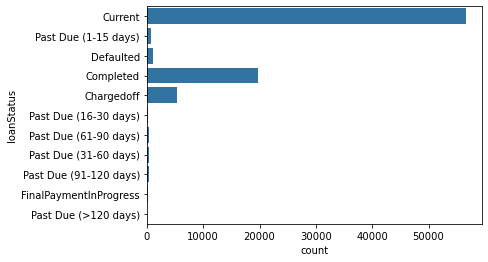

In [37]:
# Count plot of the loan status
sb.countplot(data = prosperLoan_sub, y = 'loanStatus', color = base_color);

#### _Most of the loans are currently ongoing  followed by the completed, chargedoff, defaulted, past due (1-15 days) and so on._ 

### DebtToIncomeRatio
- DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. The ratio of debt to income indicates spending habits of the borrower.

In [38]:
# Checking for null values
prosperLoan_sub['DebtToIncomeRatio'].isnull().value_counts()

False    77658
True      7306
Name: DebtToIncomeRatio, dtype: int64

Text(0.5, 1.0, 'The Distribution of Debt-to-Income-Ratio')

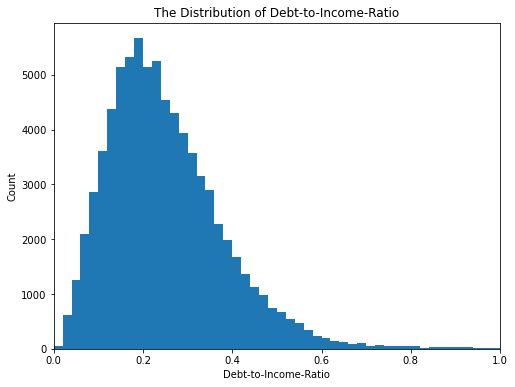

In [39]:
# histogram of the debt to income ratio
plt.figure(figsize = [8, 6])
bins = np.arange(0, prosperLoan_sub['DebtToIncomeRatio'].max()+ 0.02, 0.02)
plt.hist(data = prosperLoan_sub, x = 'DebtToIncomeRatio', bins = bins);
plt.xlim(0, 1)
plt.xlabel('Debt-to-Income-Ratio')
plt.ylabel('Count')
plt.title('The Distribution of Debt-to-Income-Ratio')

#### _The distribution of the debt to income ratio is unimodal and  skewed  to the right. If the ratio is equal to or greater than 1, this means the borrower can not afford to pay back the debt. This strongly affect the loan status.  The long tail indicates that there is an outliers.  The debt to income ratio above 1 will be dropped._

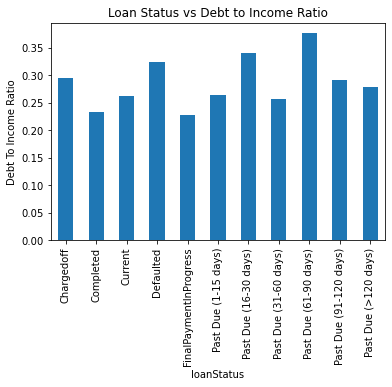

In [40]:
## Feature engineering of loanStatus and DebtToIncomeRatio variables
prosperLoan_sub.groupby('loanStatus')['DebtToIncomeRatio'].mean().plot(kind ='bar');
plt.ylabel('Debt To Income Ratio');
plt.title('Loan Status vs Debt to Income Ratio');

#### _Based on this plot, debt-to-income-ratio has an influence on the loan status. Loans that are charged-off, defaulted, and past due (61-90 days)  have high debt to income ratio. The plot shows that current status got the highest number of listings, followed by chargedoff and completed._

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribtuions of the borrower's interest rate and the borrower APR are multimodal. Since their distribution almost look the same, they may have a strong correlation. The two distribution are concerated between 0.05 and 0.39. Although it is not my variable of interest, I perform transformation on the loan original amount due to its skewness to the right. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  The distribution of debtToIncomeRatio is skewed to the right with long tail which indicates that theer are some outliers. The California State has the highest number of loan listing with a very wide margin whcih is very unsual. I did change some datatypes to the appropriate ones and dropped some rows that have null values especially for my variables of interest and features that have great impacts on their investigation. 




## Bivariate Exploration

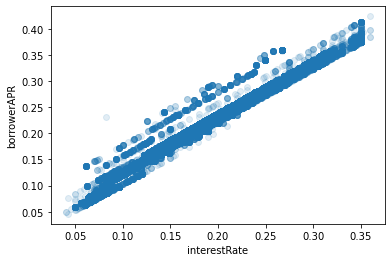

In [41]:
# scatter plot to investigate between interestRate and borrowerRate
sb.regplot(data = prosperLoan_sub, x = 'interestRate', y ='borrowerAPR', fit_reg = False, scatter_kws = {'alpha':1/8});

#### _There is a positive correlation between borrower_APR and borrower interest. This means, interest rate affects my variable of interest._ 

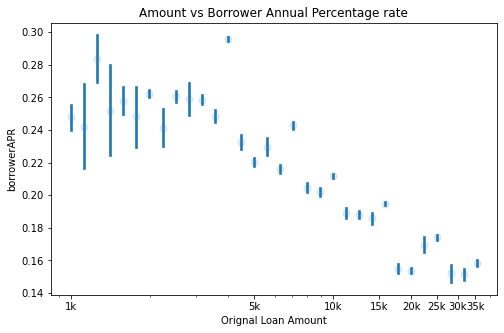

In [42]:
# Regplot of loan original amount and the borrower APR
plt.figure(figsize=[8, 5])
log_binsize = 0.050
x_bins = 10 ** np.arange(2.5, np.log10(prosperLoan_sub['amount'].max())+log_binsize, log_binsize)
sb.regplot(data = prosperLoan_sub, x = 'amount', y ='borrowerAPR',x_bins = x_bins, scatter_kws = {'alpha':1/8}, fit_reg = False)
plt.xscale('log')
plt.xticks([1e3, 5e3, 1e4, 1.5e4, 2e4, 2.5e4, 3e4, 3.5e4],['1k', '5k', '10k', '15k','20k','25k', '30k', '35k'])
plt.xlabel('Orignal Loan Amount');
plt.title('Amount vs Borrower Annual Percentage rate')
plt.show()

#### _Below 5k, we have APR greater than 0.20 and above 15k, the APR is below 0.20. The two variables are negatively correlated based on the plot._

Text(0.5, 1.0, 'BowwerAPR VS Prosper Rating')

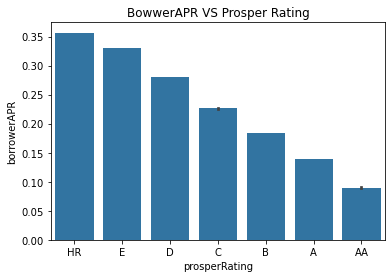

In [43]:
# Using adapted bar chart to illustrate the effect of prosper rating on the borrower APR 
sb.barplot(data = prosperLoan_sub, x = 'prosperRating', y = 'borrowerAPR', color = base_color, order = rating_order);
plt.title('BowwerAPR VS Prosper Rating')

#### _From the bar chart, as the prosper rating increase from 'HR' to 'AA' , the borrower annual percentage rate decreases. This clearly illustrate strong negative correlation between the borrower APR and the prosper rating. If a borrower has a high prosper rating, they are more like to have a low borrower annual percentage rate_ 

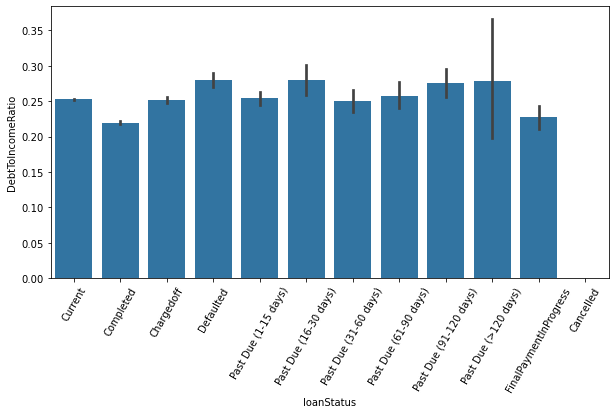

In [44]:
# Using adapted bar chart to illustrate the effect of prosper rating on the borrower APR 
# Debt income ratio less 100% are selected. 
prosperLoan_sub = prosperLoan_sub[prosperLoan_sub['DebtToIncomeRatio']< 1]
status_order = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)','Past Due (16-30 days)',
                'Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)',
                'FinalPaymentInProgress', 'Cancelled']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = status_order)
prosperLoan_sub['loanStatus'] = prosperLoan_sub['loanStatus'].astype(ordered_var)

plt.figure(figsize =[10, 5])
sb.barplot(data = prosperLoan_sub, x = 'loanStatus', y = 'DebtToIncomeRatio', color = base_color);
plt.xticks(rotation = 60);

#### _The loans with completed, finalpaymenyprogress and current status have low debt-to-income ratio. This means that borrowers with low debt-to-income are likely to complete the repayment of their listed loans._ 

Text(0.5, 1.0, 'BorrowerAPR VS DebtToIncomeRation')

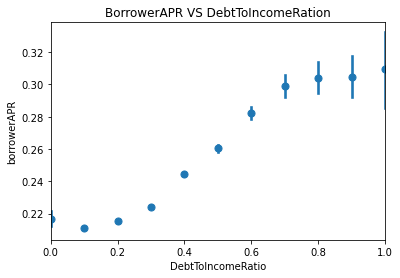

In [45]:
# Remove debt to income ratio below 1
prosperLoan_sub = prosperLoan_sub.query('DebtToIncomeRatio <= 1.0')
# Regplot of DebtToIncomeRatio and borrowerAPR
bins = np.arange(0, prosperLoan_sub['DebtToIncomeRatio'].max()+0.1, 0.1)
sb.regplot(data = prosperLoan_sub, x = 'DebtToIncomeRatio', y ='borrowerAPR', x_bins = bins, 
          fit_reg = False)
plt.xlim(0, 1);
plt.title('BorrowerAPR VS DebtToIncomeRation')

#### _There is positve correlation between the borrower APR and debt-to-income ratio._

Text(0.5, 1.0, 'BorrowerAPR VS ListingCategory')

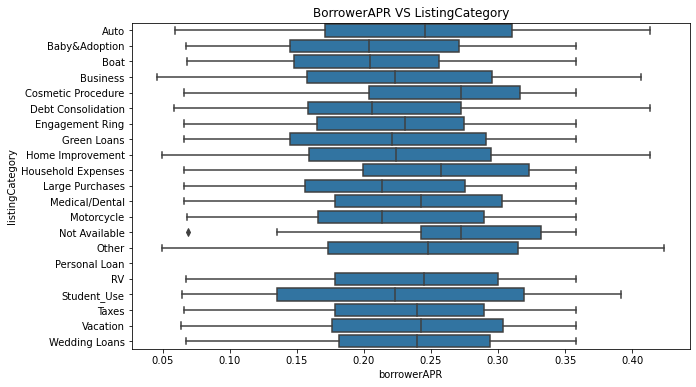

In [46]:
# adapted boxplot for borrowerAPR and Listing Category  
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[0]
sb.boxplot(data = prosperLoan_sub, x = 'borrowerAPR', y = 'listingCategory', color = base_color);
plt.title('BorrowerAPR VS ListingCategory')

#### _The borrowerAPR is different from one listing category to another. Cosmetic Procedure has the highest borrowerAPR  which is the extra cost, different from the interest rate,  paid by borrowers. This might have led to low counts of indivduals that receive loans for comestic procedure._

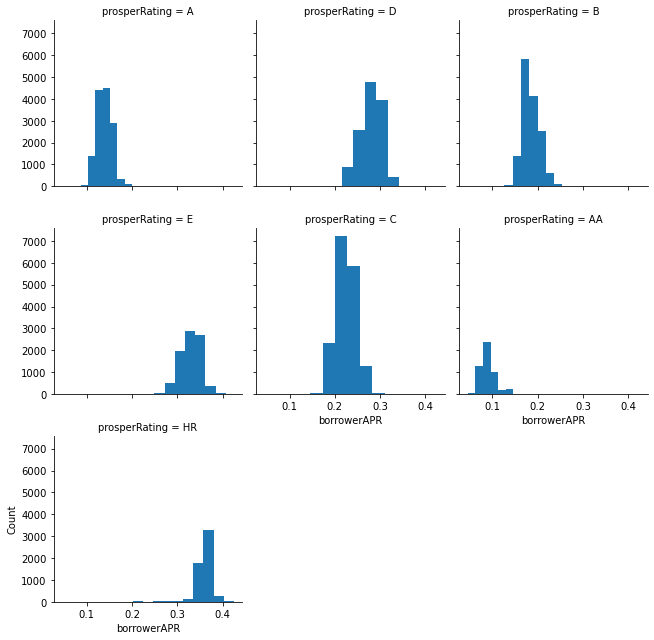

In [47]:
# Plot illustrating the interval of borrowerAPR where prosper rating fits 
g = sb.FacetGrid(data = prosperLoan_sub, col = 'prosperRating', col_wrap = 3);
g.map(plt.hist, 'borrowerAPR');
plt.ylabel('Count');

#### _In order of incresing prosper rating, borrowers with 'AA' has the lowest borrowerAPR foloowed by 'A', 'B', 'C, 'D' and so forth. This clearly illustrate a correlation between borrowerAPR and prosperRating, although there are some overlappings._

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The prosper_rating has positive correlation with borrower APR, that is, the APR tends to reduce as we move from lower rating to higher ones. Borrowers with the better Prosper ratings have the lowest borrower's APR. Also, more borrowers with debt to income ration less than 1 were able complete their payment than those with debt to income ratio greater than or equal to 1. Borrowers with good rating also have larger monthly income and loan amount. 

> Certain listing category is associated with lower APR while other are associated with high APR. For instance, loans listed for cosmetics procedure have a very high APR. The debt-to-income ratio has posity correlation with borroerAPR. As one debt-to-income ratio increases, the APR also increases.  


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that certain states were favored in terms of loan listing. California is one state that got far more listing than other States. After my investigation, I found out that the disparity was due to the high employment ststus and income  in  California. There is relationship between loan amount and  employment status.

## Multivariate Exploration

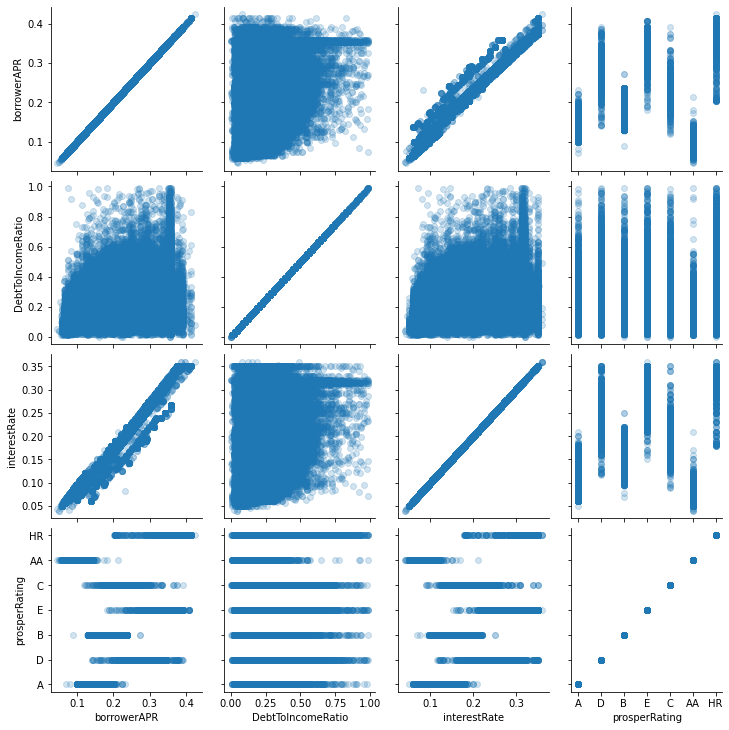

In [48]:
# Multivariate plot for 4 variables of interest
prosperLoans = ['borrowerAPR', 'DebtToIncomeRatio', 'interestRate', 'prosperRating']
g = sb.PairGrid(data = prosperLoan_sub, vars = prosperLoans)
g.map(plt.scatter, alpha = 0.2)
plt.show()

#### _This multivariate plot illustrate  the relationship between 4 variables of interest. Despite some overlapping, i can see relationship between the interestRate and prosperRating, interestRate and borrowerAPr, and so on. _  

(0.0, 35000.0)

<Figure size 576x360 with 0 Axes>

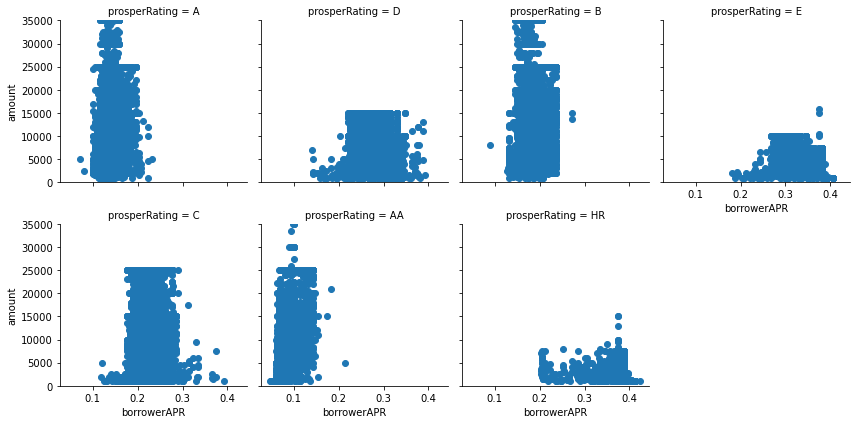

In [51]:
# FacetGrid plot for three variables of interest
plt.figure(figsize = [8, 5])
#bins = np.arange(0, prosperLoan_sub['DebtToIncomeRatio'].max()+ 0.02, 0.02)
g = sb.FacetGrid(data = prosperLoan_sub, col = 'prosperRating', size = 3, margin_titles = True,
                col_wrap = 4);
g.map(plt.scatter, 'borrowerAPR','amount');
plt.ylim(0, 35000)

#### _Although there are points that overlapped, DebtToIncomeRatio and prosperRating are two key factors that affect the borrowerAPR.  This observation is supported by the multivariate plot above.  

<Figure size 720x432 with 0 Axes>

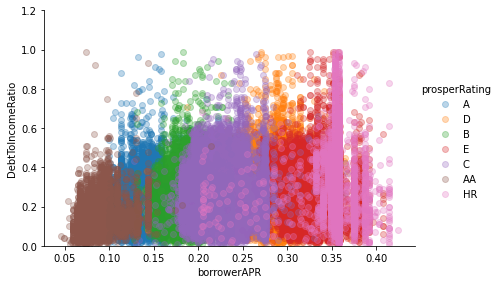

In [52]:
#  Color encoding for 3 variables of interest
plt.figure(figsize = [10, 6])
g = sb.FacetGrid(data = prosperLoan_sub, hue = 'prosperRating', size = 4, aspect = 1.5);
g.map(plt.scatter, 'borrowerAPR', 'DebtToIncomeRatio', alpha = 0.3);
plt.ylim(0, 1.2)
g.add_legend()

#### _Based on the graph above, the prosperRating 'AA' has the lowest borrowerAPR followed by 'A', 'B', 'C' and so forth. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this third part of my data exploration, I focused on finding some relations between my variable of interest - borrowerAPR and loan status- and other variables which I thought, could impact my investigation. Most of the realtionship discovered in the univariate and bivariate explorations were justified by the multivariate. InterstRate, prosperRating and debt-to-income ratio correlate with my variables of interest. 

### Were there any interesting or surprising interactions between features?

> A surprising interaction I found between the borrowerAPR and debt-to-income ratio is that in bivariate plot with proper binsize, there is positive correlation existing between them. Another surprising interaction is the negative correlation between the borrowerAPR and the loan amount. 

### References:
- 1. https://mode.com/blog/violin-plot-examples/
- 2. https://www.statisticshowto.com/categorical-distribution/
- 3. https://seaborn.pydata.org/tutorial/axis_grids.html